In [1]:
%matplotlib inline


# Legend guide


Generating legends flexibly in Matplotlib.

.. currentmodule:: matplotlib.pyplot

This legend guide is an extension of the documentation available at
:func:`~matplotlib.pyplot.legend` - please ensure you are familiar with
contents of that documentation before proceeding with this guide.


This guide makes use of some common terms, which are documented here for clarity:

.. glossary::

    legend entry
        A legend is made up of one or more legend entries. An entry is made up of
        exactly one key and one label.

    legend key
        The colored/patterned marker to the left of each legend label.

    legend label
        The text which describes the handle represented by the key.

    legend handle
        The original object which is used to generate an appropriate entry in
        the legend.


Controlling the legend entries
==============================

Calling :func:`legend` with no arguments automatically fetches the legend
handles and their associated labels. This functionality is equivalent to::

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

The :meth:`~matplotlib.axes.Axes.get_legend_handles_labels` function returns
a list of handles/artists which exist on the Axes which can be used to
generate entries for the resulting legend - it is worth noting however that
not all artists can be added to a legend, at which point a "proxy" will have
to be created (see `proxy_legend_handles` for further details).

For full control of what is being added to the legend, it is common to pass
the appropriate handles directly to :func:`legend`::

    line_up, = plt.plot([1,2,3], label='Line 2')
    line_down, = plt.plot([3,2,1], label='Line 1')
    plt.legend(handles=[line_up, line_down])

In some cases, it is not possible to set the label of the handle, so it is
possible to pass through the list of labels to :func:`legend`::

    line_up, = plt.plot([1,2,3], label='Line 2')
    line_down, = plt.plot([3,2,1], label='Line 1')
    plt.legend([line_up, line_down], ['Line Up', 'Line Down'])



Creating artists specifically for adding to the legend (aka. Proxy artists)
===========================================================================

Not all handles can be turned into legend entries automatically,
so it is often necessary to create an artist which *can*. Legend handles
don't have to exists on the Figure or Axes in order to be used.

Suppose we wanted to create a legend which has an entry for some data which
is represented by a red color:



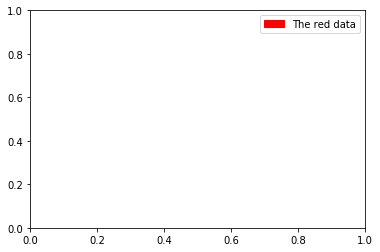

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

There are many supported legend handles, instead of creating a patch of color
we could have created a line with a marker:



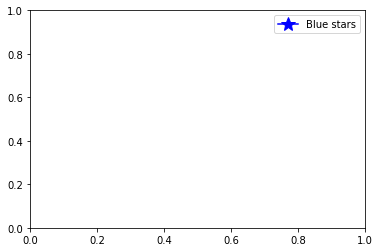

In [3]:
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

Legend location
===============

The location of the legend can be specified by the keyword argument
*loc*. Please see the documentation at :func:`legend` for more details.

The ``bbox_to_anchor`` keyword gives a great degree of control for manual
legend placement. For example, if you want your axes legend located at the
figure's top right-hand corner instead of the axes' corner, simply specify
the corner's location, and the coordinate system of that location::

    plt.legend(bbox_to_anchor=(1, 1),
               bbox_transform=plt.gcf().transFigure)

More examples of custom legend placement:



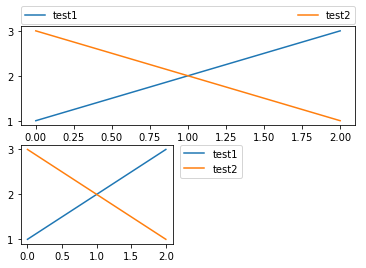

In [4]:
plt.subplot(211)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")

# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Multiple legends on the same Axes
=================================

Sometimes it is more clear to split legend entries across multiple
legends. Whilst the instinctive approach to doing this might be to call
the :func:`legend` function multiple times, you will find that only one
legend ever exists on the Axes. This has been done so that it is possible
to call :func:`legend` repeatedly to update the legend to the latest
handles on the Axes, so to persist old legend instances, we must add them
manually to the Axes:



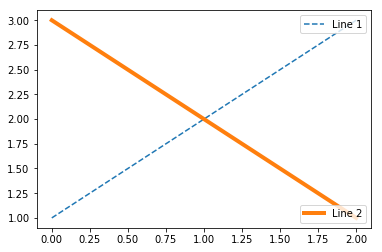

In [5]:
line1, = plt.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = plt.plot([3, 2, 1], label="Line 2", linewidth=4)

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)

# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)

plt.show()

Legend Handlers
===============

In order to create legend entries, handles are given as an argument to an
appropriate :class:`~matplotlib.legend_handler.HandlerBase` subclass.
The choice of handler subclass is determined by the following rules:

    1. Update :func:`~matplotlib.legend.Legend.get_legend_handler_map`
       with the value in the ``handler_map`` keyword.
    2. Check if the ``handle`` is in the newly created ``handler_map``.
    3. Check if the type of ``handle`` is in the newly created
       ``handler_map``.
    4. Check if any of the types in the ``handle``'s mro is in the newly
       created ``handler_map``.

For completeness, this logic is mostly implemented in
:func:`~matplotlib.legend.Legend.get_legend_handler`.

All of this flexibility means that we have the necessary hooks to implement
custom handlers for our own type of legend key.

The simplest example of using custom handlers is to instantiate one of the
existing :class:`~matplotlib.legend_handler.HandlerBase` subclasses. For the
sake of simplicity, let's choose :class:`matplotlib.legend_handler.HandlerLine2D`
which accepts a ``numpoints`` argument (note numpoints is a keyword
on the :func:`legend` function for convenience). We can then pass the mapping
of instance to Handler as a keyword to legend.



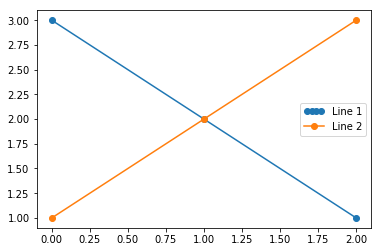

In [6]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot([3, 2, 1], marker='o', label='Line 1')
line2, = plt.plot([1, 2, 3], marker='o', label='Line 2')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

As you can see, "Line 1" now has 4 marker points, where "Line 2" has 2 (the
default). Try the above code, only change the map's key from ``line1`` to
``type(line1)``. Notice how now both :class:`~matplotlib.lines.Line2D` instances
get 4 markers.

Along with handlers for complex plot types such as errorbars, stem plots
and histograms, the default ``handler_map`` has a special ``tuple`` handler
(:class:`~matplotlib.legend_handler.HandlerTuple`) which simply plots
the handles on top of one another for each item in the given tuple. The
following example demonstrates combining two legend keys on top of one another:



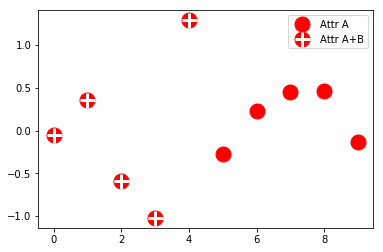

In [7]:
from numpy.random import randn

z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

The :class:`~matplotlib.legend_handler.HandlerTuple` class can also be used to
assign several legend keys to the same entry:



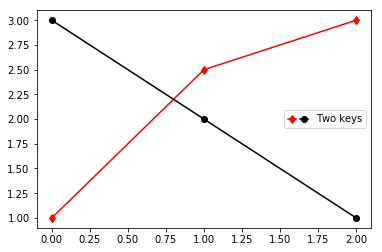

In [8]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

p1, = plt.plot([1, 2.5, 3], 'r-d')
p2, = plt.plot([3, 2, 1], 'k-o')

l = plt.legend([(p1, p2)], ['Two keys'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)})

Implementing a custom legend handler
------------------------------------

A custom handler can be implemented to turn any handle into a legend key (handles
don't necessarily need to be matplotlib artists).
The handler must implement a "legend_artist" method which returns a
single artist for the legend to use. Signature details about the "legend_artist"
are documented at :meth:`~matplotlib.legend_handler.HandlerBase.legend_artist`.



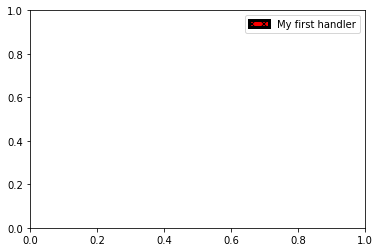

In [9]:
import matplotlib.patches as mpatches


class AnyObject(object):
    pass


class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch


plt.legend([AnyObject()], ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()})

Alternatively, had we wanted to globally accept ``AnyObject`` instances without
needing to manually set the ``handler_map`` keyword all the time, we could have
registered the new handler with::

    from matplotlib.legend import Legend
    Legend.update_default_handler_map({AnyObject: AnyObjectHandler()})

Whilst the power here is clear, remember that there are already many handlers
implemented and what you want to achieve may already be easily possible with
existing classes. For example, to produce elliptical legend keys, rather than
rectangular ones:



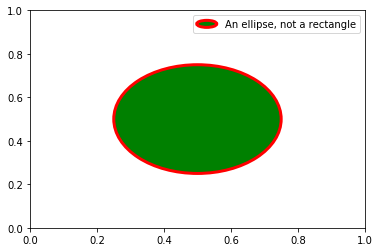

In [10]:
from matplotlib.legend_handler import HandlerPatch


class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})